At first, we import all libraries needed for our work


In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import math

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

Reading the data using pandas


In [2]:

data = pd.read_csv(os.path.join('Data', 'house_data_complete.csv'))
data=data.to_numpy()



m=data.shape[0]  #The number of examples in dataset



Plotting the price with respect to one feature at a time

11
33


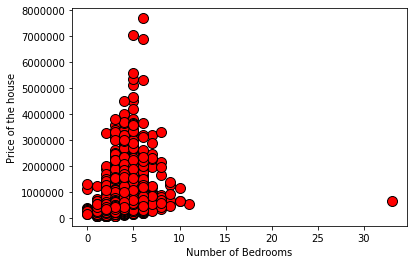

In [3]:
fig = pyplot.figure()  

pyplot.plot(data[:,3],data[:,2] , 'ro', ms=10, mec='k')

pyplot.ylabel('Price of the house')
pyplot.xlabel('Number of Bedrooms')

for i in range(data[:,3].shape[0]):
    if(data[i,3]>10):
        print(data[i,3])




Text(0.5, 0, 'Number of Bathrooms')

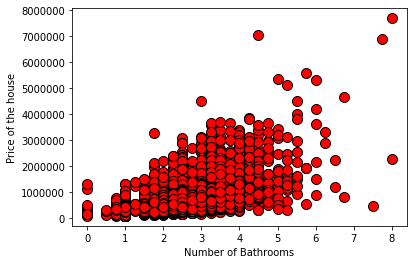

In [4]:
fig = pyplot.figure()  
    
pyplot.plot(data[:,4],data[:,2] , 'ro', ms=10, mec='k')
pyplot.ylabel('Price of the house')
pyplot.xlabel('Number of Bathrooms')

A method to divide the Data into training cross validation and testing with known percentages

In [5]:
def divideData(data, start, train_prec, cv_prec, test_prec):
    m=data.shape[0]
    if (start <0 or start> m ):
        print('Invalid Start')
        return
    if(train_prec+cv_prec+ test_prec > 100):
        print('Invalid Percentages')
        return
    
    
    m_train= math.ceil(m*(train_prec/100))
    m_cv= round(m*(cv_prec/100))
    m_test= round(m*(test_prec/100))
    
    
    if(start+m_train > m):
        print('Wrap Around')
        dif= start+m_train - m
        data_train= np.append(data[start: (m),:],(data[0:dif,:]),axis=0)
        if(dif+m_cv>m):
            dif1=(dif+m_cv)-m
            data_cv=np.append(data[dif: (m),:],(data[0:dif1,:]),axis=0)
            if(dif1+m_test>m):
                dif2= dif1+m_test-m
                data_test=np.append(data[dif1: (m),:],(data[0:dif2,:]),axis=0)
            else:
                data_test= data[dif1: dif1+m_test,:]       
        else:
            data_cv=data[dif: dif+m_cv,:]
            if(dif+m_cv+m_test>m):
                dif3= dif+m_cv+m_test - m
                data_test=np.append(data[dif+m_cv+m_test: (m),:],(data[0:dif3,:]),axis=0)
            else:
                data_test= data[dif+m_cv: dif+m_cv+m_test,:]
            
        data_cv= data[dif: dif+m_cv,:]
        data_test= data[dif+m_cv: dif+m_cv+m_test,:]
    else:
        
        data_train = data[start:start+m_train,:]
        if(start+m_train+m_cv>m):
            dif=(start+m_train+m_cv)-m
            data_cv=np.append(data[start+m_train+m_cv: (m),:],(data[0:dif,:]),axis=0)
            if(dif+m_test>m):
                dif1= dif+m_test-m
                data_test=np.append(data[dif: (m),:],(data[0:dif1,:]),axis=0)
            else:
                data_test= data[dif: dif+m_test,:]       
        else:
            data_cv=data[start+m_train: start+m_train+m_cv,:]
            if(start+m_train+m_cv+m_test>m):
                dif3= start+m_train+m_cv+m_test - m
                data_test=np.append(data[start+m_train+m_cv: (m),:],(data[0:dif3,:]),axis=0)
            else:
                data_test= data[start+m_train+m_cv: start+m_train+m_cv+m_test,:]
            
       # data_cv= data[dif: dif+m_cv,:]
       # data_test= data[dif+m_cv: dif+m_cv+m_test,:]
        
   
    
    X=data_train[:,3:data.shape[1]]
    y=data_train[:,2]
    
    X_cv=data_cv[:,3:data.shape[1]]
    y_cv=data_cv[:,2]
    
    X_test=data_test[:,3:data.shape[1]]
    y_test=data_test[:,2]
    
    return X,y,X_cv,y_cv,X_test,y_test

Implementing a method to normalize the data 


In [6]:
def  featureNormalize(X):
    
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    for i in range(np.size(X,1)):
        mu[i]= np.mean(X[:, i])
        sigma[i]=np.std(X[:, i])
        X_norm[:,i]= np.subtract(X_norm[:,i],mu[i])
        X_norm[:,i]= np.divide(X_norm[:,i],sigma[i])
       
        
        
    
    # ================================================================
    return X_norm, mu, sigma

In [7]:
def getHypothesis(X, theta,degree ):
    h=0
    if(degree<0):
        print("Invalid degree")
        return
    else:
        i=1
        while(degree>0):
            p=np.power(X,i)
            t=np.dot(p,theta)
            h= h+ t
            i=i+1
            degree=degree-1
    return h
    

In [8]:
def computeCost(X, y, theta, penalty,degree):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h= getHypothesis(X,theta,degree)
    h=np.subtract(h,y)
    h=np.power(h, 2)
    J=np.sum(h)
    J=J/(2*m)
    t=np.power(theta, 2)
    t=np.sum(t)
    t=(penalty/(2*m))*t
    J=J+t
    
    # ==================================================================
    return J

In [9]:
def computeCostCV(X, y, theta,degree):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h= getHypothesis(X,theta,degree)
    h=np.subtract(h,y)
    h=np.power(h, 2)
    J=np.sum(h)
    J=J/(2*m)
    # ==================================================================
    return J

In [10]:

def gradientDescent(X, y, theta, alpha, num_iters,penalty,degree):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        alphabym=alpha/m
        sumofh0x=getHypothesis(X,theta,degree)
        theta=np.multiply(theta, (1-((alpha*penalty)/m)))-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta, penalty,degree))
    
    return theta, J_history

Finding the best regularization penalty(lambda) from a range of lambda's . A small range is used to decrease the run time 

In [11]:
def findPenalty(X, y, theta,alpha,num_iters,degree):
    penalty_range=np.array([0,0.01,0.02,0.04,0.08,0.16])#,.032,0.64,1.28,2.56,5.12,10.24])
    J_cv=np.zeros(penalty_range.shape[0])
    for i in range(penalty_range.shape[0]):
        theta = np.zeros(X.shape[1])
        theta, J_history = gradientDescent(X, y, theta, alpha, num_iters,penalty_range[i],degree)
        J_cv[i]=computeCostCV(X_cv, y_cv, theta,degree)
        
    return penalty_range[np.argmin(J_cv)]




For a Degree  1  hypothesis, the Theta's are : [533224.4669952731 -31104.856813628714 29864.09051034278 78738.92429379812
 6382.387981950587 713.0497759692227 52404.99519601544 40335.86578865386
 19092.380451529956 102233.3234420271 74280.76432577835 25119.177286582883
 -79212.78235850367 9403.032123242767 -30998.519608819246 81545.567900569
 -27377.07128375922 29396.849342186866 -11977.22115382324] With a lambda of value:  0.0
For a Degree  2  hypothesis, the Theta's are : [145096.85367943736 2486.7949510785775 19395.5362251048 20620.348366541286
 2.2969200121251485 17685.99622740029 2985.9408094642613 8335.548053907141
 15716.24926350808 44390.03595921181 14828.171959738205 14863.617542689131
 -29357.21759006196 5330.509930512306 1871.8007348158 67630.08578497835
 -9107.071336426152 27204.81073996442 -2373.626500470709] With a lambda of value:  0.0
For a Degree  3  hypothesis, the Theta's are : [109286.42202996906 140.09870053533336 4449.028503670764 3353.112455228374
 16.79696868011

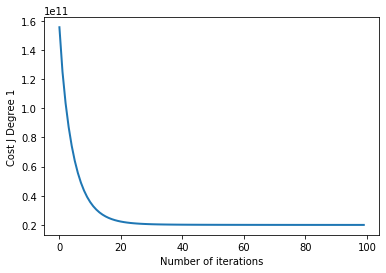

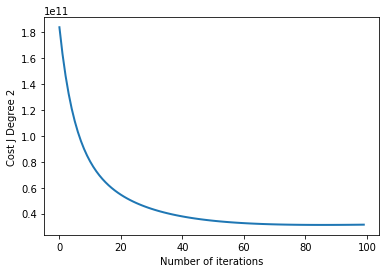

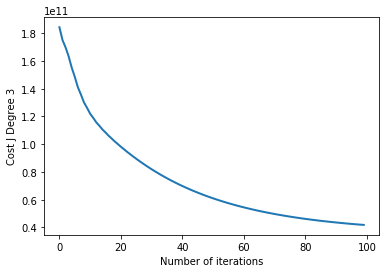

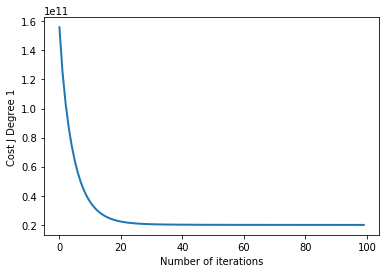

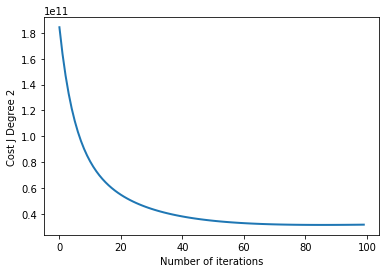

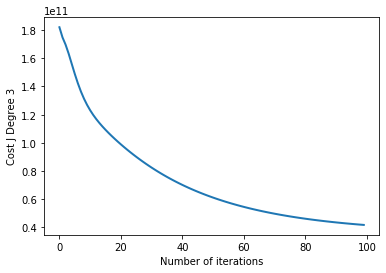

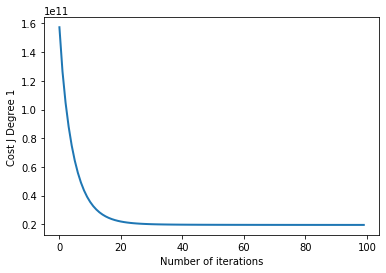

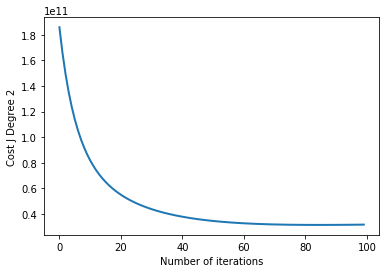

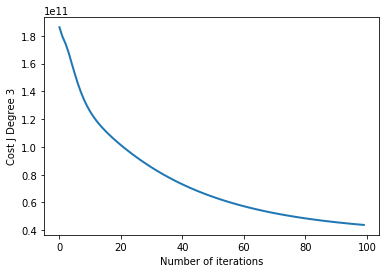

In [14]:

for k in range(3):
    

    J_fold1 = np.zeros(3)
    J_fold2 = np.zeros(3)
    J_fold3 = np.zeros(3)

    X,y,X_cv,y_cv,X_test,y_test=divideData(data, k*2000, 80,10,10)


    X_norm, mu, sigma = featureNormalize(X)

    X_cv, mu1, sigma1 = featureNormalize(X_cv)

    X_test, mu2, sigma2 = featureNormalize(X_test)

    # Add intercept term to X
    X = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

    X_cv = np.concatenate([np.ones((X_cv.shape[0], 1)), X_cv], axis=1)

    X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)



    alpha = 0.1
    num_iters = 100
    degree=np.array([1,2,3])
    J_deg=np.zeros(degree.shape[0])


    theta = np.zeros(X.shape[1])
    best_penalty=findPenalty(X, y, theta,alpha,num_iters,degree[0])
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters,best_penalty,degree[0])
    J_deg[0]= computeCost(X_cv,y_cv,theta, best_penalty,degree[0])
    print("For a Degree ",degree[0]," hypothesis, the Theta's are :",theta, "With a lambda of value: ",best_penalty)
    J_fold1[k]= computeCost(X_test, y_test, theta, 0,degree[0])

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J Degree 1')

    alpha = 0.01
    num_iters = 100


    theta = np.zeros(X.shape[1])
    best_penalty=findPenalty(X, y, theta,alpha,num_iters,degree[1])
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters,best_penalty,degree[1])
    J_deg[1]= computeCost(X_cv,y_cv,theta, best_penalty,degree[1])
    print("For a Degree ",degree[1]," hypothesis, the Theta's are :",theta, "With a lambda of value: ",best_penalty)
    J_fold2[k]= computeCost(X_test, y_test, theta, best_penalty,degree[1])

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J Degree 2')


    alpha = 0.005
    num_iters = 100

    theta = np.zeros(X.shape[1])
    best_penalty=findPenalty(X, y, theta,alpha,num_iters,degree[2])
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters,best_penalty,degree[2])
    J_deg[2]= computeCost(X_cv,y_cv,theta, best_penalty,degree[2])
    print("For a Degree ",degree[2]," hypothesis, the Theta's are :",theta, "With a lambda of value: ",best_penalty)
    J_fold3[k]= computeCost(X_test, y_test, theta, best_penalty,degree[2])

    pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J Degree 3')


print("Average error for degree 1 : ", np.mean(J_fold1))
print("Average error for degree 2 : ", np.mean(J_fold2))
print("Average error for degree 3 : ", np.mean(J_fold3))

J_fold=np.array([J_fold1 ,J_fold2 ,J_fold3])
print("Best hypothesis  is degree" , np.argmin(J_fold)+1)

    



